<a href="https://colab.research.google.com/github/RaianaSeixas/Python-/blob/main/Python_for_Finance/Analyzing_a_Portfolio_EUA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import yfinance as yf
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = [15, 6] # mudar área dos gráficos
import statsmodels.api as sm

In [22]:
# Potfolio Definition

'''
 Let's create our portfolio as 30% Apple, 20% Amazon, 40% Microsoft and 10% Tesla.
'''
stocks = ['AAPL', 'AMZN', 'MSFT', 'TSLA']
weights = [0.3, 0.2, 0.4, 0.1] #proportion of each stock in the portifolio

today= datetime.date(datetime.now()) #today
start= today - timedelta(days =364)  # take 1 year range
end=today 

data = yf.download(stocks, start=start, end=end) # web scraping from Yahoo Finance

[*********************100%***********************]  4 of 4 completed


In [23]:
'''
Daily returns

To get the daily portfolio returns, we multiplied the daily returns by the weights and calculated the sum of the results.
'''
x = data['Close'].pct_change()

#portfolio return
ret = (x * weights).sum(axis = 1)

#total cumulative returns for our portfolio
cumulative = (ret + 1).cumprod() 

print(cumulative)

Date
2021-06-07    1.000000
2021-06-08    1.003927
2021-06-09    1.006723
2021-06-10    1.016206
2021-06-11    1.020022
                ...   
2022-05-27    1.060225
2022-05-31    1.065531
2022-06-01    1.066214
2022-06-02    1.086666
2022-06-03    1.051387
Length: 252, dtype: float64


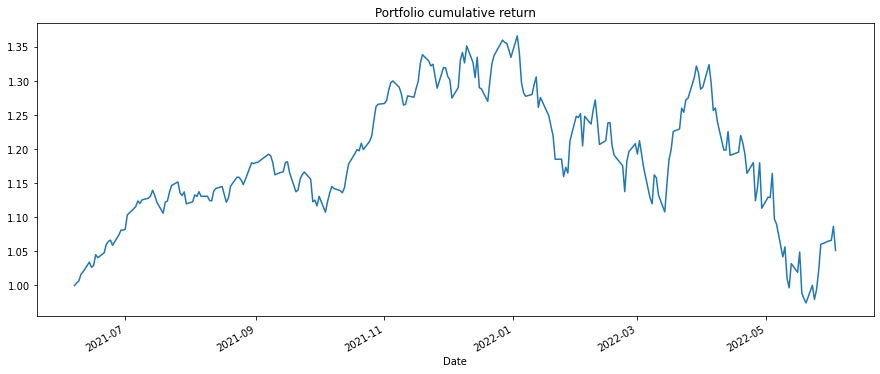

In [24]:
'''
Plotting the cumulative returns will give us a better understanding of the data:
'''
cumulative.plot()
plt.title('Portfolio cumulative return')

plt.savefig('plot.png')

In [25]:
# Risk % of portfolio.

print('Daily volatility=',np.std(ret)) # daily volatility = standard deviation of the portfolio return

# We can calculate the annual volatility by taking the square root of the number of trading days in a year (252) and multiply it by the daily volatility

annual_std = np.std(ret) * np.sqrt(252) 
print('Annual volatility=',annual_std)

Daily volatility= 0.017567985507366143
Annual volatility= 0.2788831241332662


In [26]:
'''
Sharpe ratio is the measure of the risk-adjusted return of a portfolio. 
A portfolio with a higher Sharpe ratio is considered better.

To calculate the Sharpe ratio, we need to take the average return and divide it by the volatility.
'''

sharpe = (np.mean(ret) / np.std(ret))*np.sqrt(252) #We multiplied the result by the square root of 252 to annualize the Sharpe ratio. (There are 252 trading days in a year)

print('Annual Sharpe ratio=',sharpe)

Annual Sharpe ratio= 0.32000879483223776


          AAPL      AMZN      MSFT      TSLA
AAPL  1.000000  0.613219  0.753321  0.562314
AMZN  0.613219  1.000000  0.633033  0.461316
MSFT  0.753321  0.633033  1.000000  0.519737
TSLA  0.562314  0.461316  0.519737  1.000000


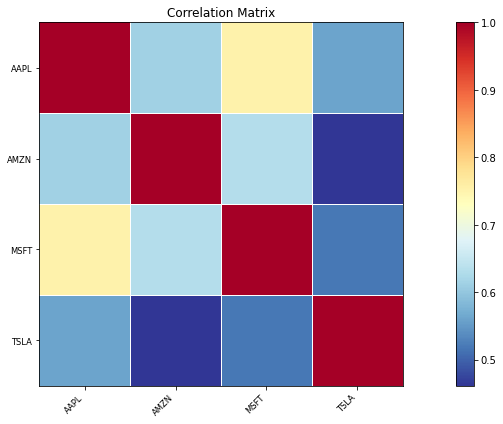

In [27]:
'''
Correlation

In finance, correlation is a statistic that measures the degree to which two securities move in relation to each other. The corr() function results in a matrix that includes values for each stock pair. The values are in the range of -1 to 1. A positive correlation means that the stocks have returns that are positively correlated and move in the same direction. +1 means that the returns are perfectly correlated.
Finding stocks that have low correlation helps to diversify an investment portfolio and minimize risk.'''

x = data['Close'].pct_change()
corr = x.corr()
print(corr) 

# Graph
sm.graphics.plot_corr(corr, xnames=list(x.columns))
plt.savefig('plot.png')